In [1]:
import os
BAR = 'Barcodes'
ROOT = os.path.join(open('../root').read().strip(), 'common')
print ROOT
img_path = os.path.join(os.path.dirname(ROOT), BAR, 'Images')
print img_path
conf_path = os.path.join(os.path.dirname(ROOT), BAR, 'Annotations')
print conf_path
voc_path = os.path.join(os.path.dirname(ROOT), 'VOC', 'JPEGImages')
print voc_path

/home/nik-kochetov/work/common
/home/nik-kochetov/work/Barcodes/Images
/home/nik-kochetov/work/Barcodes/Annotations
/home/nik-kochetov/work/VOC/JPEGImages


In [2]:
from model import SSDModel
ssd_model = SSDModel()

Using Theano backend.


(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
(None, None, None, 1)
skip weight for: block4_pool
skip weight for: block5_conv1
skip weight for: block5_conv2
skip weight for: block5_conv3
skip weight for: block5_pool


In [3]:
import converter
reload(converter)
from converter import Converter
ssd_converter = Converter(ROOT)
ssd_converter.process_rects(conf_path, ssd_model, 10, 1)

10 files to process
0 Interleaved_2_of_5_(1)_0088_15.xml 5
1 Interleaved_2_of_5_Check_0099_0.xml 2
2 Code_128A_0174_42.xml 6
3 Interleaved_2_of_5_(1)_0240_15.xml 8
4 Interleaved_2_of_5_Check_0227_1.xml 0
5 Interleaved_2_of_5_(1)_0287_31.xml 0
6 Reclamations_Interleaved_2_of_5_0061_25.xml 7
7 Code_128A_0258_30.xml 19
8 Code_128C_0278_6.xml 2
9 Code_128B_0136_42.xml 4


In [4]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [5]:
print ssd_model.cls_names
print ssd_model.bbox_names

['1x1_block4_class', '2x1_block4_class', '3x1_block4_class', '1x2_block4_class', '1x3_block4_class']
['1x1_dy_block4_bbox', '1x1_dx_block4_bbox', '1x1_sh_block4_bbox', '1x1_sw_block4_bbox', '2x1_dy_block4_bbox', '2x1_dx_block4_bbox', '2x1_sh_block4_bbox', '2x1_sw_block4_bbox', '3x1_dy_block4_bbox', '3x1_dx_block4_bbox', '3x1_sh_block4_bbox', '3x1_sw_block4_bbox', '1x2_dy_block4_bbox', '1x2_dx_block4_bbox', '1x2_sh_block4_bbox', '1x2_sw_block4_bbox', '1x3_dy_block4_bbox', '1x3_dx_block4_bbox', '1x3_sh_block4_bbox', '1x3_sw_block4_bbox']


In [6]:
def tensor_dict_to_list(model, tensor_dict):
    lst = []
    for name in ssd_model.bbox_names:
        lst.append(tensor_dict[name])
    for name in ssd_model.cls_names:
        lst.append(tensor_dict[name])
    return lst

In [7]:
import generator
reload(generator)
from generator import Generator
ssd_generator = Generator(img_path, voc_path, ssd_model, None, 0.0)

In [8]:
gen = ssd_generator.generate(ssd_converter.processed_rects, 1, True)

In [9]:
# print next(gen)[1]
for i in range(10):
    tensor = tensor_dict_to_list(ssd_model, next(gen)[1])
    has = False
    for t in tensor:
        if np.any(t[np.nonzero(t)]):
            print t.shape, t[np.nonzero(t)]
            has = True
    if has:
        break
    print '#########'

/home/nik-kochetov/work/Barcodes/Images/Code_128C_0278_6.jpg
#########
#########
#########
(1, 4, 4, 2) [ 0.11547005  1.          0.11547005  1.        ]
(1, 4, 4, 2) [ 0.14433757  1.         -0.14433757  1.        ]
(1, 4, 4, 2) [-0.45399596  1.         -0.45399596  1.        ]
(1, 4, 4, 2) [ 0.14384104  1.          0.14384104  1.        ]
(1, 4, 4, 1) [ 1.  1.]


In [10]:
print len(tensor)
for val in tensor:
    print val.shape

25
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 2)
(1, 4, 4, 1)
(1, 4, 4, 1)
(1, 4, 4, 1)
(1, 4, 4, 1)
(1, 4, 4, 1)


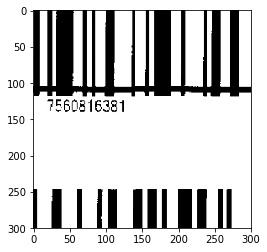

In [11]:
img = np.asarray(Image.open(os.path.join(img_path, 'Code_128C_0278_6.jpg')))
imshow(img)

In [12]:
confs, rects = ssd_converter.restore_rects_batch([tensor], ssd_model, top=10)
print confs
for rect in rects:
    rect.dump()

4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f37363bb3b0>), (0.0, <rect.Rect instance at 0x7f37363bb998>), (0.0, <rect.Rect instance at 0x7f3739655c68>), (0.0, <rect.Rect instance at 0x7f37363bbab8>), (0.0, <rect.Rect instance at 0x7f37363a8248>), (0.0, <rect.Rect instance at 0x7f3735fb2f80>), (0.0, <rect.Rect instance at 0x7f3735fb2e60>), (0.0, <rect.Rect instance at 0x7f3735fe6fc8>), (0.0, <rect.Rect instance at 0x7f3735fe6908>), (0.0, <rect.Rect instance at 0x7f37705a9830>)]
4 4
(1, 4, 4, 1)
[(0.0, <rect.Rect instance at 0x7f37363bb3b0>), (0.0, <rect.Rect instance at 0x7f37363bb998>), (0.0, <rect.Rect instance at 0x7f3739655c68>), (0.0, <rect.Rect instance at 0x7f37363bbab8>), (0.0, <rect.Rect instance at 0x7f37363a8248>), (0.0, <rect.Rect instance at 0x7f3735fb2f80>), (0.0, <rect.Rect instance at 0x7f3735fb2e60>), (0.0, <rect.Rect instance at 0x7f3735fe6fc8>), (0.0, <rect.Rect instance at 0x7f3735fe6908>), (0.0, <rect.Rect instance at 0x7f37705a9830>), (0.0, <rect.Rect instanc

In [13]:
from rect import Rect
from converter import RectsInfo
info = RectsInfo('Code_128C_0278_6.xml')
info.load_rects(conf_path)
correct = info.rects
for rect in correct:
    rect.dump()

l=0,t=245,r=300,b=300
l=0,t=0,r=300,b=120


In [14]:
tr = [] #Rect(0.319444444444,0.0138888888889,0.723424641979,0.417869086423)]

In [15]:
i = 0

l=0.158493649054,t=0.802831216351,r=0.591506350946,b=0.947168783649
l=47.5480947162,t=240.849364905,r=177.451905284,b=284.150635095
l=0.408493649054,t=0.802831216351,r=0.841506350946,b=0.947168783649
l=122.548094716,t=240.849364905,r=252.451905284,b=284.150635095


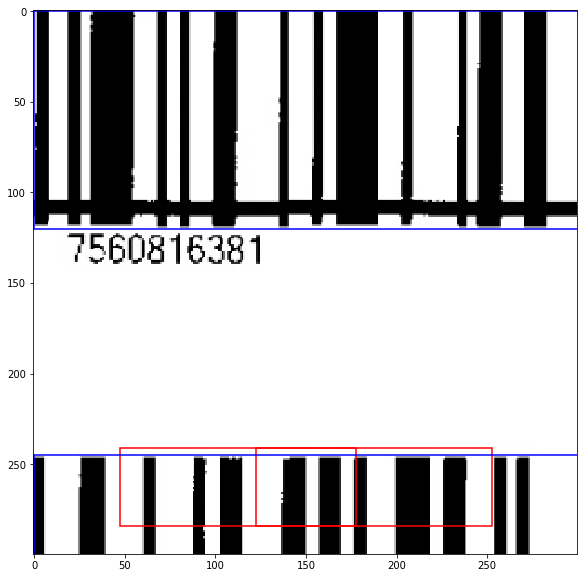

In [18]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 10))

# Display the image
ax.imshow(img)

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)

for rect in rects[:2]:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.dump()
    rr.stretch(300, 300)
    rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
for rect in correct:
    # Create a Rectangle patch
    rr = rect.copy()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='b',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
for rect in []: #tr:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.stretch(300, 300)
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='g',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()

i += 1